# Pattern Recognition and ML Project 

### Project Title - Hepatitis Mortality Prediction 

DataSet - https://archive.ics.uci.edu/ml/datasets/hepatitis



#### Workflow

    1. Data Prep
    2. EDA
    3. Feature Selection
    4. Build Model
    5. Save The Model
    6. Production with Streamlit 


#### Brief Intro of DataSets

1. Class: DIE, LIVE
2. AGE: 10, 20, 30, 40, 50, 60, 70, 80
3. SEX: male, female
4. STEROID: no, yes
5. ANTIVIRALS: no, yes
6. FATIGUE: no, yes
7. MALAISE: no, yes
8. ANOREXIA: no, yes
9. LIVER BIG: no, yes
10. LIVER FIRM: no, yes
11. SPLEEN PALPABLE: no, yes
12. SPIDERS: no, yes
13. ASCITES: no, yes
14. VARICES: no, yes
15. BILIRUBIN: 0.39, 0.80, 1.20, 2.00, 3.00, 4.00
16. ALK PHOSPHATE: 33, 80, 120, 160, 200, 250
17. SGOT: 13, 100, 200, 300, 400, 500,
18. ALBUMIN: 2.1, 3.0, 3.8, 4.5, 5.0, 6.0
19. PROTIME: 10, 20, 30, 40, 50, 60, 70, 80, 90
20. HISTOLOGY: no, yes

In [1]:
# Load and EDA Packages
import pandas as pd 
import numpy as np

# Visualization Packages
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
import sklearn.preprocessing as skp

# ML Pkg
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


# Selection
# from sklearn.model_selection import GridSearchCV as gs
from sklearn.model_selection import RandomizedSearchCV as rs
# from sklearn.model_selection import StratifiedKFold
# from sklearn.feature_selection import RFECV
#import decision tree plotting libraries
# Metrics
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score, recall_score, roc_auc_score,roc_curve, auc, f1_score 


In [2]:
# Load Our Dataset
df = pd.read_csv("data/hepatitis.data")
# Preview the first datapoint
df.head()

,2,30,2.1,1,2.2,2.3,2.4,2.5,1.1,2.6,2.7,2.8,2.9,2.10,1.00,85,18,4.0,?,1.2
0,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
1,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
2,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
3,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,0.90,95,28,4.0,75,1


In [3]:
col_names = ["Class","AGE","SEX","STEROID","ANTIVIRALS","FATIGUE","MALAISE","ANOREXIA","LIVER BIG","LIVER FIRM","SPLEEN PALPABLE","SPIDERS","ASCITES","VARICES","BILIRUBIN","ALK PHOSPHATE","SGOT","ALBUMIN","PROTIME","HISTOLOGY"]
df = pd.read_csv("data/hepatitis.data",names=col_names)
df.head()

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,?,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
3,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1


In [4]:
# Convert ot lowercase
df.columns = df.columns.str.lower().str.replace(' ','_')
df.head()

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,?,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
3,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1


## Exploratory Data Analysis(EDA)

#### Convert the Class into Boolean type

In [5]:
df["class"].replace((1,2),(0,1),inplace=True)
df["class"]=df["class"].astype("bool")


#### Checking the Null Values

In [6]:
df.isnull().sum()

class              0
age                0
sex                0
steroid            0
antivirals         0
fatigue            0
malaise            0
anorexia           0
liver_big          0
liver_firm         0
spleen_palpable    0
spiders            0
ascites            0
varices            0
bilirubin          0
alk_phosphate      0
sgot               0
albumin            0
protime            0
histology          0
dtype: int64

### Discretization of Age Column

In [7]:
df['age'].max()

78

In [8]:
df['age'].min()

7

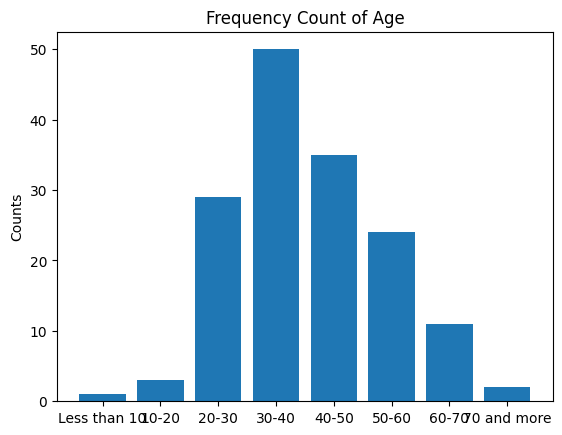

In [9]:
labels = ["Less than 10","10-20","20-30","30-40","40-50","50-60","60-70","70 and more"]
bins= [0,10,20,30,40,50,60,70,80]
freq_df = df.groupby(pd.cut(df['age'],bins=bins,labels=labels)).size()

freq_df = freq_df.reset_index(name='count')

# Plot of Freq Table
plt.bar(freq_df['age'],freq_df['count'])
plt.ylabel('Counts')
plt.title('Frequency Count of Age')
plt.show()

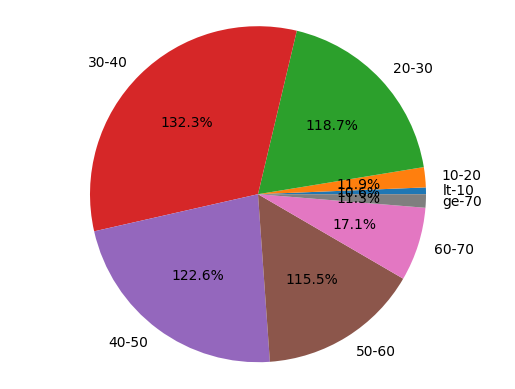

In [10]:
# Pie chart
labels = ['lt-10',"10-20","20-30","30-40","40-50","50-60","60-70","ge-70"]
fig1,ax1 = plt.subplots()
ax1.pie(freq_df['count'],labels=labels,autopct='1%.1f%%')
ax1.axis('equal')
plt.show()

### Narative
+ Highest prevalence of Hepatitis is from 30-40 followed by 40-50
+ The least is individual under 10, and elderly above 70


### Replacing ? with 0

In [11]:
# Replace ? with 0
df = df.replace('?',0)

In [12]:
df.head()

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,True,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,0,1
1,True,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,0,1
2,True,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,0,1
3,True,31,1,0,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,True,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,0,200,4.0,0,1


In [13]:
df.dtypes

class                bool
age                 int64
sex                 int64
steroid            object
antivirals          int64
fatigue            object
malaise            object
anorexia           object
liver_big          object
liver_firm         object
spleen_palpable    object
spiders            object
ascites            object
varices            object
bilirubin          object
alk_phosphate      object
sgot               object
albumin            object
protime            object
histology           int64
dtype: object

In [14]:
# How many columns with object
sum(df.dtypes == 'object')

15

In [15]:
df.columns[df.dtypes == 'object']

Index(['steroid', 'fatigue', 'malaise', 'anorexia', 'liver_big', 'liver_firm',
       'spleen_palpable', 'spiders', 'ascites', 'varices', 'bilirubin',
       'alk_phosphate', 'sgot', 'albumin', 'protime'],
      dtype='object')

### Casting - Converting dtypes Object to Int

In [16]:
# Casting
# Convert from one dt to another
df[['steroid', 'fatigue', 'malaise', 'anorexia', 'liver_big', 'liver_firm',
       'spleen_palpable', 'spiders', 'ascites', 'varices', 
       'alk_phosphate', 'sgot', 'protime']] = df[['steroid', 'fatigue', 'malaise', 'anorexia', 'liver_big', 'liver_firm',
       'spleen_palpable', 'spiders', 'ascites', 'varices',
       'alk_phosphate', 'sgot', 'protime']].astype(int)

In [17]:
df.dtypes

class                bool
age                 int64
sex                 int64
steroid             int64
antivirals          int64
fatigue             int64
malaise             int64
anorexia            int64
liver_big           int64
liver_firm          int64
spleen_palpable     int64
spiders             int64
ascites             int64
varices             int64
bilirubin          object
alk_phosphate       int64
sgot                int64
albumin            object
protime             int64
histology           int64
dtype: object

In [18]:
df.head(5)

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,True,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,0,1
1,True,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,0,1
2,True,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,0,1
3,True,31,1,0,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,True,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,0,200,4.0,0,1


### Casting - Bilirubin and albumin are converted into float type.

In [19]:
df[['bilirubin','albumin']] = df[['bilirubin','albumin']].astype(float)

In [20]:
df.dtypes

class                 bool
age                  int64
sex                  int64
steroid              int64
antivirals           int64
fatigue              int64
malaise              int64
anorexia             int64
liver_big            int64
liver_firm           int64
spleen_palpable      int64
spiders              int64
ascites              int64
varices              int64
bilirubin          float64
alk_phosphate        int64
sgot                 int64
albumin            float64
protime              int64
histology            int64
dtype: object

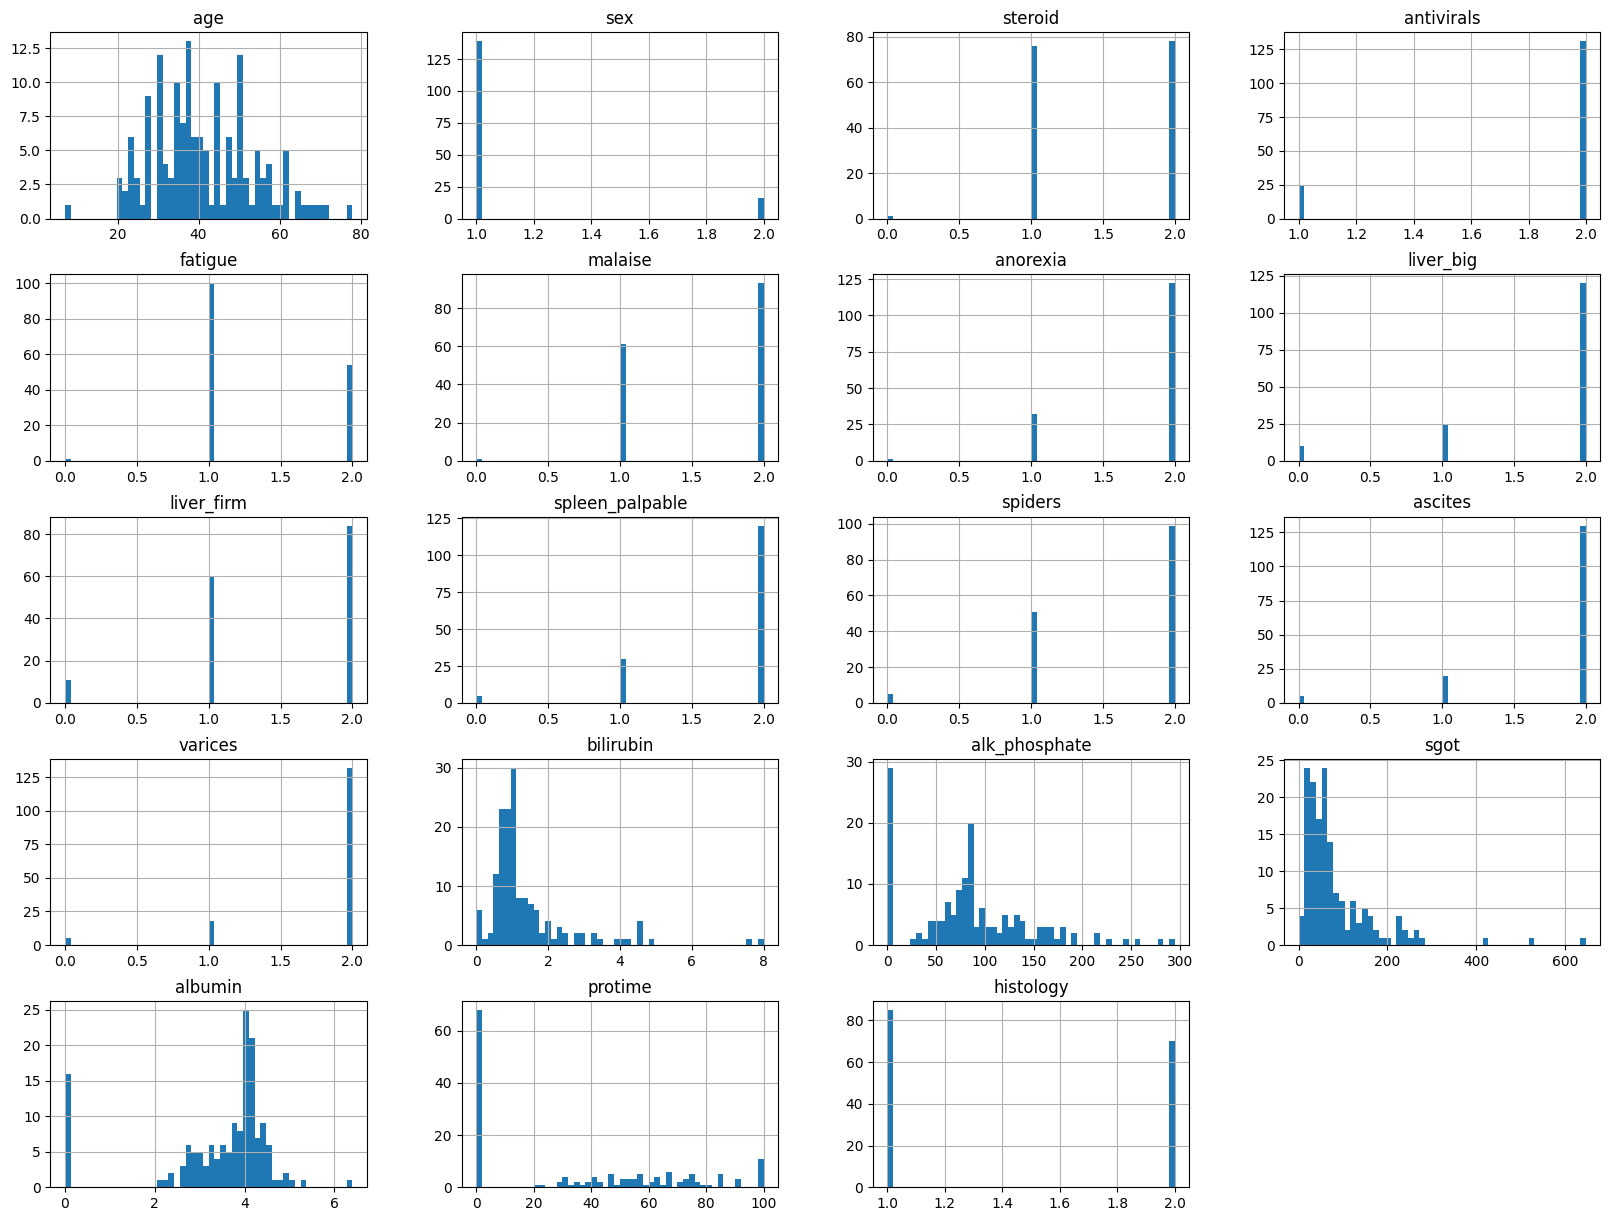

In [21]:
### Plot of distribution of data
df.hist(bins=50,figsize=(20,15))
plt.show()

## Checking the Outliers

## Feature Selection and Importance
+ Univariate 
    + SelectKbest - Chi2
        - Select features according to the highest K Scores.
        - For selecting K score we are using Chi2
        - Chi- Squared stats of non-negative features for classification task
        - Thus, Strong relation with the output/target
+ Multivariate

    + Recursive Feature Elimination 
        - Fits the model and discard the weakest features untill specified number of features is reached.

In [22]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection  import chi2


In [23]:
x_features = df[['age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise',
       'anorexia', 'liver_big', 'liver_firm', 'spleen_palpable', 'spiders',
       'ascites', 'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin',
       'protime', 'histology']]
ylabels = df['class']

In [24]:
# using Skbest
skb = SelectKBest(score_func=chi2,k=10)
best_feature_fit = skb.fit(x_features,ylabels)

In [25]:
# Highest score shows the best fit
print("Scores",best_feature_fit.scores_)

Scores [ 28.47481919   0.38948319   0.3995129    0.18634161   2.34643234
   2.46803203   0.19648065   0.31698209   0.9867095    0.74535155
   3.18940804   2.09639954   1.12812176  30.10247172  17.88270548
  47.38820795   6.87318606 130.18332457   3.01854675]


In [26]:
# Transform(Optional)
bf_02 = best_feature_fit.transform(x_features)

In [27]:
bf_02

array([[30. ,  2. ,  2. , ...,  4. ,  0. ,  1. ],
       [50. ,  1. ,  2. , ...,  3.5,  0. ,  1. ],
       [78. ,  1. ,  2. , ...,  4. ,  0. ,  1. ],
       ...,
       [61. ,  1. ,  1. , ...,  4.1,  0. ,  2. ],
       [53. ,  1. ,  2. , ...,  4.1, 48. ,  2. ],
       [43. ,  1. ,  2. , ...,  3.1, 42. ,  2. ]])

In [28]:
# Mapping to Feature Name
feature_scores = pd.DataFrame(best_feature_fit.scores_,columns=['Feature_Scores'])

In [29]:
feature_scores

,Feature_Scores
0,28.474819
1,0.389483
2,0.399513
3,0.186342
4,2.346432
5,2.468032
6,0.196481
7,0.316982
8,0.986710
9,0.745352


In [30]:
feature_column_names = pd.DataFrame(x_features.columns,columns=['Feature_name_chi2'])
best_feat_df = pd.concat([feature_scores,feature_column_names],axis=1)

In [31]:
best_feat_df

,Feature_Scores,Feature_name_chi2
0,28.474819,age
1,0.389483,sex
2,0.399513,steroid
3,0.186342,antivirals
4,2.346432,fatigue
5,2.468032,malaise
6,0.196481,anorexia
7,0.316982,liver_big
8,0.986710,liver_firm
9,0.745352,spleen_palpable


In [32]:
# Get the best
# The higher the number the more important the feature
best_feat_df.nlargest(14,'Feature_Scores')

,Feature_Scores,Feature_name_chi2
17,130.183325,protime
15,47.388208,sgot
13,30.102472,bilirubin
0,28.474819,age
14,17.882705,alk_phosphate
16,6.873186,albumin
10,3.189408,spiders
18,3.018547,histology
5,2.468032,malaise
4,2.346432,fatigue


In [33]:
from sklearn.feature_selection import f_classif
# using Skbest
skb1 = SelectKBest(score_func=f_classif,k=10)
best_feature_fit1 = skb1.fit(x_features,ylabels)
# Transform(Optional)
bf_01 = best_feature_fit.transform(x_features)
# Mapping to Feature Name
feature_scores1 = pd.DataFrame(best_feature_fit1.scores_,columns=['Feature_Scores'])
feature_column_names1 = pd.DataFrame(x_features.columns,columns=['Feature_name_with_f_classif'])
best_feat_df1 = pd.concat([feature_scores1,feature_column_names1],axis=1)



In [34]:
# Get the best
# The higher the number the more important the feature
best_feat_df1.nlargest(14,'Feature_Scores')

,Feature_Scores,Feature_name_with_f_classif
13,33.635444,bilirubin
18,19.714833,histology
11,19.055718,ascites
10,18.722638,spiders
5,16.969192,malaise
16,14.745776,albumin
4,14.283414,fatigue
12,10.166096,varices
0,7.755646,age
9,5.175952,spleen_palpable


<AxesSubplot: >

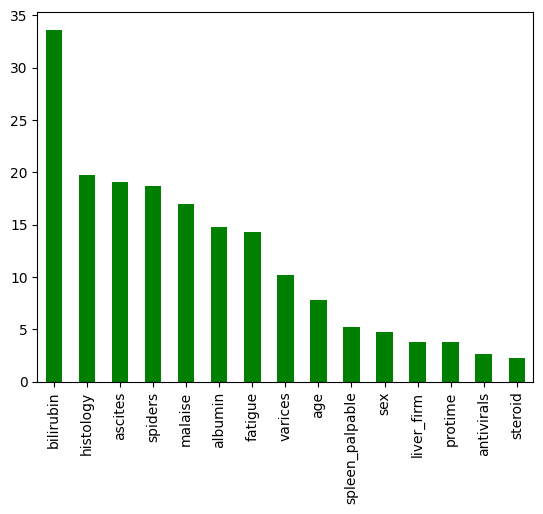

In [35]:
# Mapping to Feature Name
feature_scores1_ = pd.Series(best_feature_fit1.scores_,index=x_features.columns)
feature_scores1_.nlargest(15).plot(kind='bar', color=['green'])

feature_names_best = ['age', 'sex', 'steroid', 'antivirals', 'fatigue', 'spiders', 'ascites','varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin', 'protime','histology']

#### Checking for Feature Importance
+ ExtraTreeClassifier
+ Which feature is important

In [36]:
from sklearn.ensemble import ExtraTreesClassifier

In [37]:
# Init
et_clf = ExtraTreesClassifier()
et_clf.fit(x_features,ylabels)

ExtraTreesClassifier()

In [38]:
# Print Important
print(et_clf.feature_importances_)


[0.05858447 0.02113792 0.03069099 0.00860038 0.03148353 0.05237984
 0.02457487 0.04151481 0.04807891 0.03674329 0.07505232 0.07731422
 0.05341232 0.09862086 0.07729934 0.05206817 0.08418255 0.06640611
 0.06185509]


In [39]:
feature_imporance_df = pd.Series(et_clf.feature_importances_,index=x_features.columns)

In [40]:
feature_imporance_df

age                0.058584
sex                0.021138
steroid            0.030691
antivirals         0.008600
fatigue            0.031484
malaise            0.052380
anorexia           0.024575
liver_big          0.041515
liver_firm         0.048079
spleen_palpable    0.036743
spiders            0.075052
ascites            0.077314
varices            0.053412
bilirubin          0.098621
alk_phosphate      0.077299
sgot               0.052068
albumin            0.084183
protime            0.066406
histology          0.061855
dtype: float64

<AxesSubplot: >

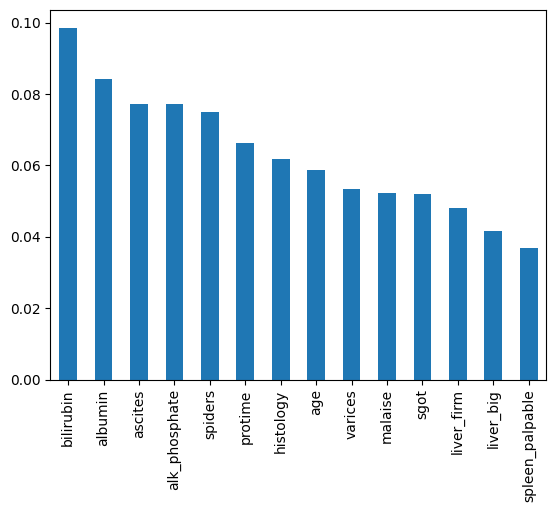

In [41]:
feature_imporance_df.nlargest(14).plot(kind='bar')

#### Narrative
+ All the methods gave us almost the same features to use

In [42]:
# Correlation
df.corr()

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
class,1.000000,-0.219647,0.173051,0.121140,-0.130196,0.292206,0.315970,0.110715,0.102151,0.154736,0.180894,0.330194,0.332796,0.249610,-0.424523,-0.050806,-0.056679,0.296489,0.154688,-0.337856
age,-0.219647,1.000000,0.008126,-0.067710,-0.013100,-0.264635,-0.099516,0.100589,-0.126358,-0.100979,-0.127258,-0.206551,-0.125020,-0.114412,0.095626,0.045328,0.078021,-0.191174,-0.059956,0.170780
sex,0.173051,0.008126,1.000000,-0.039222,-0.089249,-0.063947,-0.020895,0.025186,0.023634,0.015750,-0.078414,-0.065592,0.049516,-0.005045,-0.039341,0.162851,-0.008991,-0.018906,0.067128,-0.137450
steroid,0.121140,-0.067710,-0.039222,1.000000,0.101657,0.146292,0.232041,0.084752,0.159877,0.095280,0.071401,0.029781,-0.002593,-0.029759,-0.005835,-0.042245,-0.021032,0.203109,0.032994,-0.070144
antivirals,-0.130196,-0.013100,-0.089249,0.101657,1.000000,-0.065578,-0.026703,-0.052554,-0.060626,-0.019871,-0.183070,-0.176367,-0.176382,-0.167721,0.177958,0.041764,0.095980,-0.153939,-0.276452,0.209242
fatigue,0.292206,-0.264635,-0.063947,0.146292,-0.065578,1.000000,0.617660,0.419991,0.168796,0.254621,0.226850,0.380935,0.288877,0.217311,-0.243964,-0.110505,-0.175476,0.198983,0.073783,-0.131177
malaise,0.315970,-0.099516,-0.020895,0.232041,-0.026703,0.617660,1.000000,0.631662,0.192556,0.197903,0.145236,0.376666,0.376182,0.267029,-0.269910,-0.114810,-0.177297,0.224605,0.067186,-0.116964
anorexia,0.110715,0.100589,0.025186,0.084752,-0.052554,0.419991,0.631662,1.000000,0.185164,0.144556,0.185004,0.371874,0.301514,0.288883,-0.244095,0.035984,-0.188183,0.133743,0.108322,-0.049702
liver_big,0.102151,-0.126358,0.023634,0.159877,-0.060626,0.168796,0.192556,0.185164,1.000000,0.698517,0.338963,0.370229,0.339108,0.238645,-0.028856,0.018895,-0.026293,0.105555,0.174677,-0.104757
liver_firm,0.154736,-0.100979,0.015750,0.095280,-0.019871,0.254621,0.197903,0.144556,0.698517,1.000000,0.322955,0.407114,0.310338,0.295100,-0.069352,-0.179977,-0.149876,0.059700,0.083312,-0.206632


<AxesSubplot: >

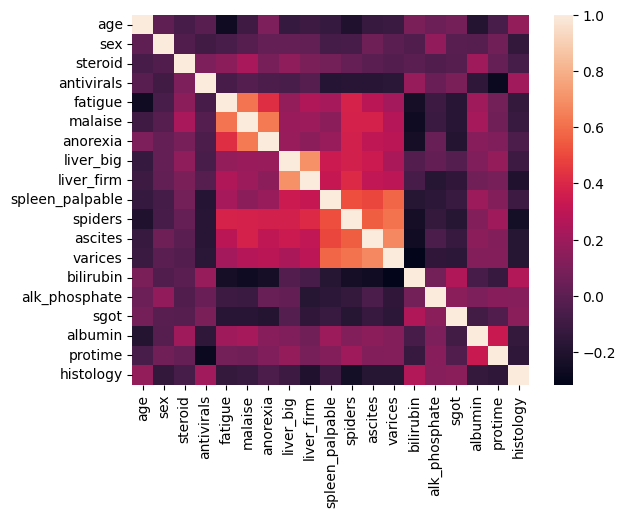

In [43]:
# Heatmap for Correlation
sns.heatmap(x_features.corr())

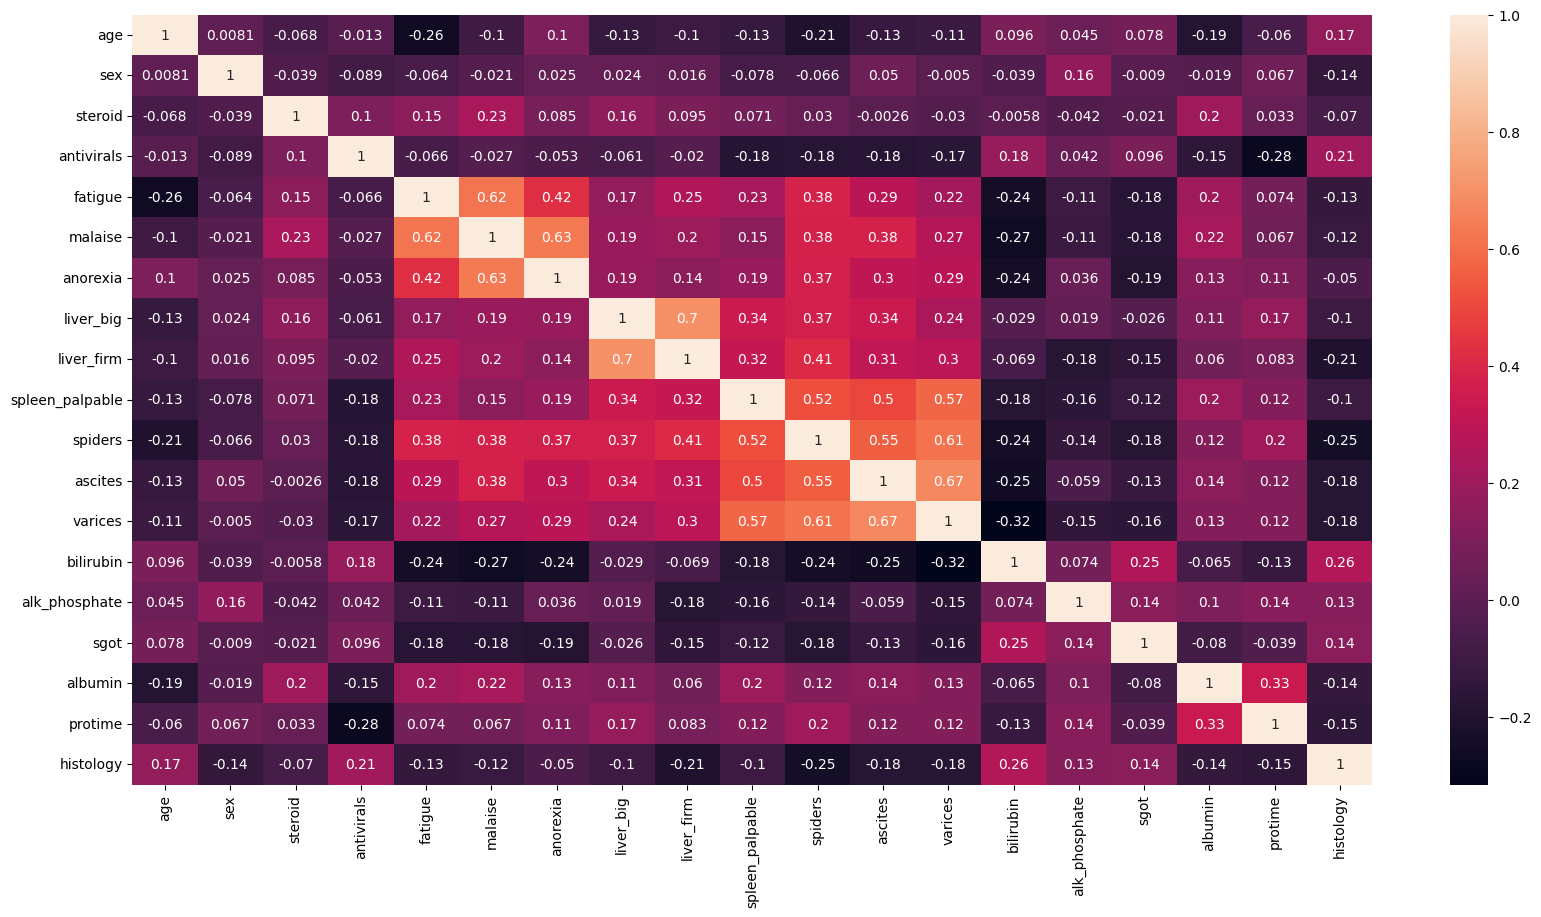

In [44]:
# Heatmap for Correlation with Annot
plt.figure(figsize=(20,10))
sns.heatmap(x_features.corr(),annot=True)
plt.show()

In [45]:
X = df[['age', 'sex', 'steroid', 'antivirals', 'fatigue', 'spiders', 'ascites','varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin', 'protime','histology']]
y = df["class"]

### Train Test Split

In [46]:
### Making X Scalar for ML algorithms
X_ = skp.StandardScaler().fit(X).transform(X )

In [47]:
trainX, testX, trainy, testy= train_test_split(X_,y, test_size=0.25, random_state=99) #explain random state


print("\n shape of train split: ")
print(trainX.shape, trainy.shape)
print("\n shape of train split: ")
print(testX.shape, testy.shape)


 shape of train split: 
(116, 14) (116,)

 shape of train split: 
(39, 14) (39,)


In [49]:
lrg=LogisticRegression(solver='lbfgs')
lrg.fit(trainX,trainy)
predictions1 = lrg.predict(testX)
acclrg=accuracy_score(testy, predictions1)*100
print("Accuracy of Logistic regression (%): \n",acclrg)  
#get FPR
fprlrg, tprlrg, _ = roc_curve(testy, predictions1)
auclrg=auc(fprlrg, tprlrg)*100
print("AUC OF Logistic regression (%): \n", auclrg)
recalllrg=recall_score(testy,predictions1)*100
print("Recall of Logistic regression is: \n",recalllrg)
preclrg=precision_score(testy,predictions1)*100
print("Precision of Logistic regression is: \n",preclrg)

Accuracy of Logistic regression (%): 
 82.05128205128204
AUC OF Logistic regression (%): 
 75.46296296296295
Recall of Logistic regression is: 
 92.5925925925926
Precision of Logistic regression is: 
 83.33333333333334


In [50]:
knn = KNeighborsClassifier()
knn.fit(trainX,trainy)
predictions2 = knn.predict(testX)
accknn=accuracy_score(testy, predictions2)*100
print("Accuracy of KNN (%): \n", accknn)  
#get FPR
fprknn, tprknn, _ = roc_curve(testy, predictions2)
aucknn=auc(fprknn, tprknn)*100
print("AUC OF KNN (%): \n", aucknn)
recallknn=recall_score(testy,predictions2)*100
print("Recall of KNN is: \n",recallknn)
precknn=precision_score(testy,predictions2)*100
print("Precision of KNN is: \n",precknn)

Accuracy of KNN (%): 
 74.35897435897436
AUC OF KNN (%): 
 65.27777777777777
Recall of KNN is: 
 88.88888888888889
Precision of KNN is: 
 77.41935483870968


In [51]:
dt=DecisionTreeClassifier(max_depth=10,criterion="gini")
dt.fit(trainX,trainy)
predictions = dt.predict(testX)
accdt=accuracy_score(testy, predictions)*100
print("Accuracy of Decision Tree (%): \n",accdt)  
#get FPR
fprdt, tprdt, _ = roc_curve(testy, predictions)
aucdt=auc(fprdt, tprdt)*100
print("AUC OF Decision Tree (%): \n",aucdt)
recalldt=recall_score(testy,predictions)*100
print("Recall of Decision Tree is: \n",recalldt)
precdt=precision_score(testy,predictions)*100
print("Precision of Decision Tree is: \n",precdt)

Accuracy of Decision Tree (%): 
 66.66666666666666
AUC OF Decision Tree (%): 
 55.092592592592595
Recall of Decision Tree is: 
 85.18518518518519
Precision of Decision Tree is: 
 71.875


In [52]:
algos=["K Nearest Neighbor","Logistic Regression","Decision Tree"]
acc=[accknn,acclrg,accdt]
auc = [aucknn,auclrg,aucdt]
recall=[recallknn,recalllrg,recalldt]
prec=[precknn,preclrg,precdt]
comp={"Algorithms":algos,"Accuracies":acc,"Area Under the Curve":auc,"Recall":recall,"Precision":prec}
compdf=pd.DataFrame(comp)
display(compdf.sort_values(by=["Accuracies","Area Under the Curve","Recall","Precision"], ascending=False))



,Algorithms,Accuracies,Area Under the Curve,Recall,Precision
1,Logistic Regression,82.051282,75.462963,92.592593,83.333333
0,K Nearest Neighbor,74.358974,65.277778,88.888889,77.419355
2,Decision Tree,66.666667,55.092593,85.185185,71.875000


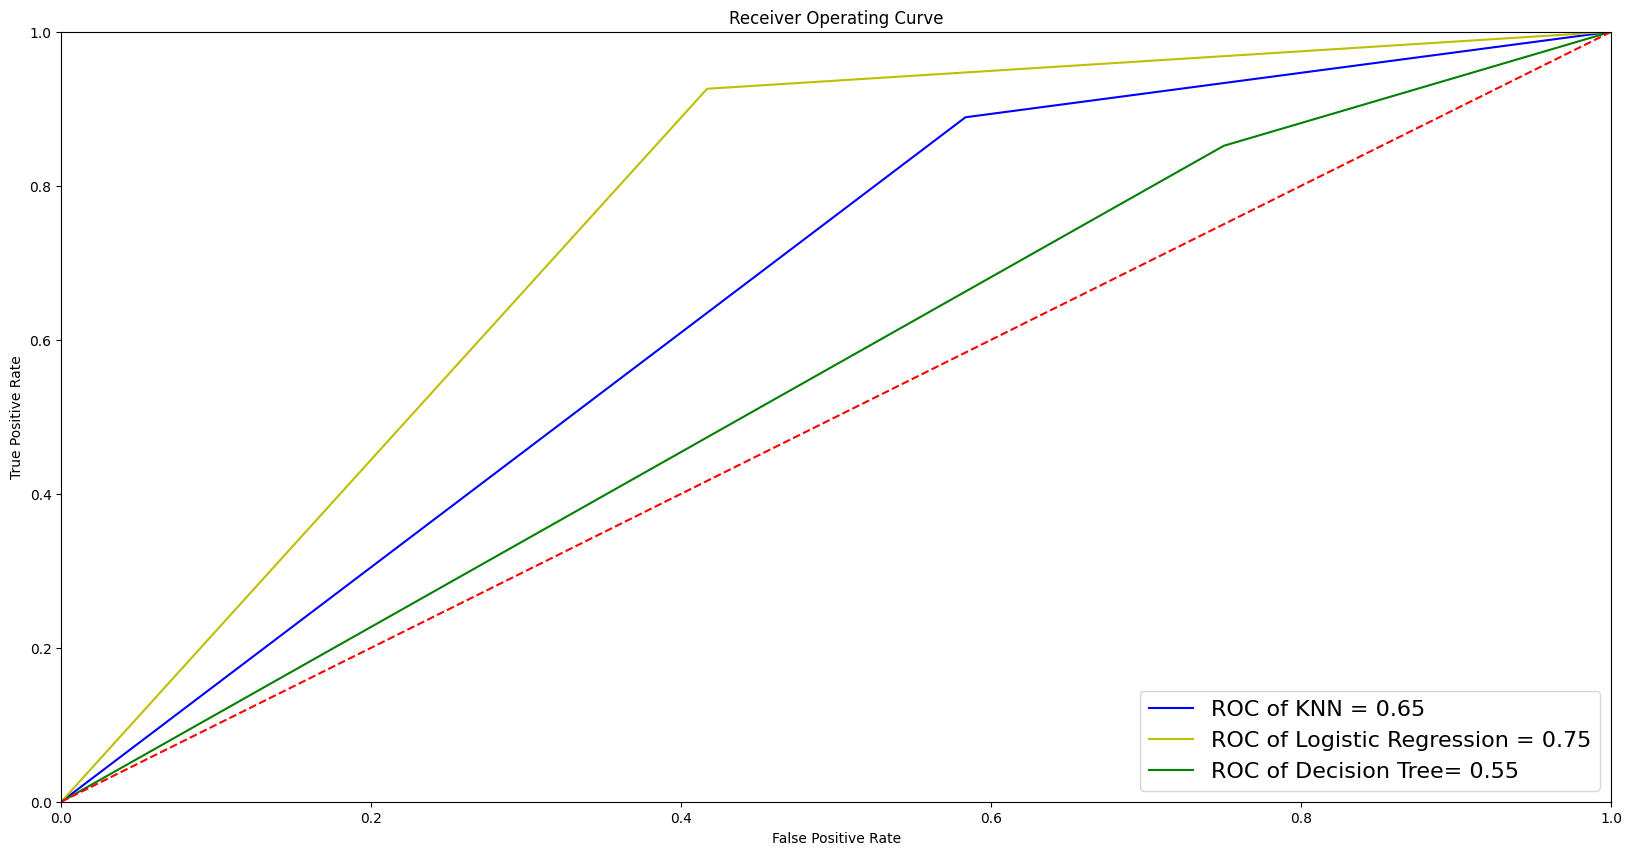

In [53]:
import sklearn.metrics as metrics
roc_auc1=metrics.auc(fprknn,tprknn)

roc_auc2=metrics.auc(fprlrg,tprlrg)

roc_auc3=metrics.auc(fprdt,tprdt)


# Method-I: PLot
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20,10))
plt.title("Receiver Operating Curve")
plt.plot(fprknn,tprknn,"b",label="ROC of KNN = %0.2f" % roc_auc1)

plt.plot(fprlrg,tprlrg,"y",label="ROC of Logistic Regression = %0.2f" % roc_auc2)

plt.plot(fprdt,tprdt,"g",label="ROC of Decision Tree= %0.2f" % roc_auc3)

plt.rcParams.update({'font.size': 16})
plt.legend(loc="lower right")
plt.plot([0, 1],[0, 1],"r--")
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")

plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=22)


### Hyperparameter Tuning using Random Search on any 4 Algorithms¶


In [54]:
from sklearn.model_selection import RandomizedSearchCV as rs
# K Nearest Neighbor with random search
parameters={"algorithm":['auto','ball_tree','kd_tree','brute'],"n_neighbors":range(1,10,1),"p":[1,2],"weights":["uniform","distance"]}
clf_knn=KNeighborsClassifier()
clfknnrs=rs(clf_knn,parameters,cv=5,scoring="precision")
clfknnrs.fit(trainX,trainy)
predictions = clfknnrs.predict(testX)
accknnrs=accuracy_score(testy, predictions)*100
print("Accuracy of KNN after Hyperparameter Tuning (%): \n",accknnrs)  
#get FPR
fprknnrs, tprknnrs, _ = roc_curve(testy, predictions)
#aucdtrs=auc(fprdtrs, tprdtrs)*100
#print("AUC OF Decision Tree after Hyperparameter Tuning (%): \n",aucdtrs)
recallknnrs=recall_score(testy,predictions)*100
print("Recall of KNN after Hyperparameter Tuning is: \n",recallknnrs)
precknnrs=precision_score(testy,predictions)*100
print("Precision of KNN after Hyperparameter Tuning is: \n",precknnrs)

#examnine the best model
#single best score achieved accross all params
print("Best Score (%): \n",clfknnrs.best_score_*100)
#Dictionary Containing the parameters 
print("Best Parameters: \n",clfknnrs.best_params_)

print("Best Estimators: \n",clfknnrs.best_estimator_)


Accuracy of KNN after Hyperparameter Tuning (%): 
 79.48717948717949
Recall of KNN after Hyperparameter Tuning is: 
 85.18518518518519
Precision of KNN after Hyperparameter Tuning is: 
 85.18518518518519
Best Score (%): 
 93.6140350877193
Best Parameters: 
 {'weights': 'uniform', 'p': 1, 'n_neighbors': 4, 'algorithm': 'ball_tree'}
Best Estimators: 
 KNeighborsClassifier(algorithm='ball_tree', n_neighbors=4, p=1)


In [55]:
from sklearn.model_selection import RandomizedSearchCV as rs
# Logistic Regression with random search
parameters={"solver":['lbfgs','newton-cg','liblinear','sag','saga'],"max_iter":range(100,500,100)}
clf_lrg=LogisticRegression()
clflrgrs=rs(clf_lrg,parameters,cv=5,scoring="precision")
clflrgrs.fit(trainX,trainy)
predictions = clflrgrs.predict(testX)
acclrgrs=accuracy_score(testy, predictions)*100
print("Accuracy of Logistic Regression after Hyperparameter Tuning (%): \n",acclrgrs)  
#get FPR
fprlrgrs, tprlrgrs, _ = roc_curve(testy, predictions)
#aucdtrs=auc(fprdtrs, tprdtrs)*100
#print("AUC OF Decision Tree after Hyperparameter Tuning (%): \n",aucdtrs)
recalllrgrs=recall_score(testy,predictions)*100
print("Recall of Logistic Regression after Hyperparameter Tuning is: \n",recalllrgrs)
preclrgrs=precision_score(testy,predictions)*100
print("Precision of Logistic Regression after Hyperparameter Tuning is: \n",preclrgrs)

#examnine the best model
#single best score achieved accross all params
print("Best Score (%): \n",clflrgrs.best_score_*100)
#Dictionary Containing the parameters 
print("Best Parameters: \n",clflrgrs.best_params_)

print("Best Estimators: \n",clflrgrs.best_estimator_)

Accuracy of Logistic Regression after Hyperparameter Tuning (%): 
 82.05128205128204
Recall of Logistic Regression after Hyperparameter Tuning is: 
 92.5925925925926
Precision of Logistic Regression after Hyperparameter Tuning is: 
 83.33333333333334
Best Score (%): 
 88.98225957049488
Best Parameters: 
 {'solver': 'saga', 'max_iter': 300}
Best Estimators: 
 LogisticRegression(max_iter=300, solver='saga')


In [56]:
from sklearn.model_selection import RandomizedSearchCV as rs
# Decision Tree with random search
parameters={"min_samples_split":range(10,200,10),"max_depth":range(1,20,1)}
clf_treers=DecisionTreeClassifier()
clfrs=rs(clf_treers,parameters,cv=5,scoring="precision")
clfrs.fit(trainX,trainy)
predictions = clfrs.predict(testX)
accdtrs=accuracy_score(testy, predictions)*100
print("Accuracy of Decision Tree after Hyperparameter Tuning (%): \n",accdtrs)  
#get FPR
fprdtrs, tprdtrs, _ = roc_curve(testy, predictions)
#aucdtrs=auc(fprdtrs, tprdtrs)*100
#print("AUC OF Decision Tree after Hyperparameter Tuning (%): \n",aucdtrs)
recalldtrs=recall_score(testy,predictions)*100
print("Recall of Decision Tree after Hyperparameter Tuning is: \n",recalldtrs)
precdtrs=precision_score(testy,predictions)*100
print("Precision of Decision Tree after Hyperparameter Tuning is: \n",precdtrs)

#examnine the best model
#single best score achieved accross all params
print("Best Score (%): \n",clfrs.best_score_*100)
#Dictionary Containing the parameters 
print("Best Parameters: \n",clfrs.best_params_)

print("Best Estimators: \n",clfrs.best_estimator_)

Accuracy of Decision Tree after Hyperparameter Tuning (%): 
 79.48717948717949
Recall of Decision Tree after Hyperparameter Tuning is: 
 92.5925925925926
Precision of Decision Tree after Hyperparameter Tuning is: 
 80.64516129032258
Best Score (%): 
 84.07251082251082
Best Parameters: 
 {'min_samples_split': 80, 'max_depth': 4}
Best Estimators: 
 DecisionTreeClassifier(max_depth=4, min_samples_split=80)


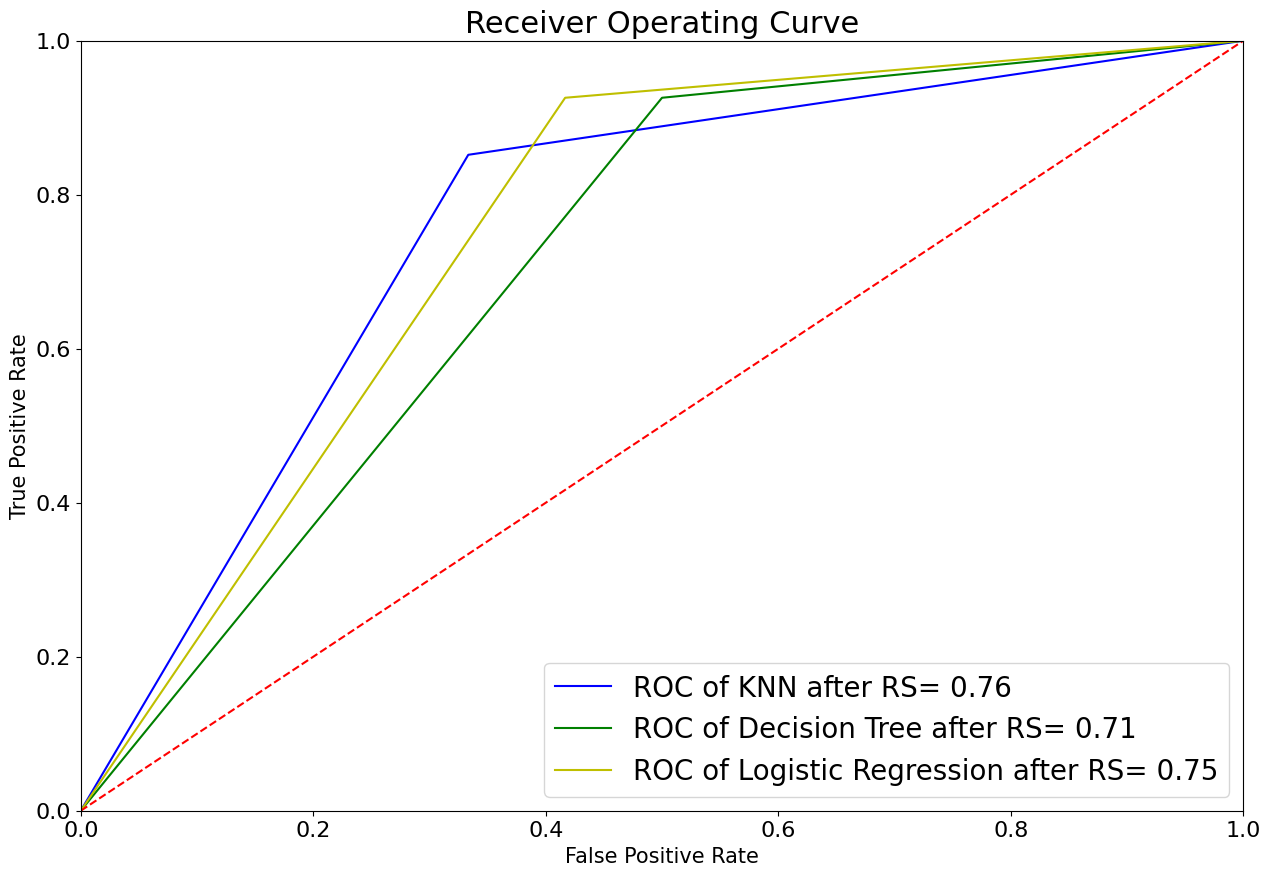

In [57]:
roc_auc1=metrics.auc(fprknnrs,tprknnrs)
roc_auc2=metrics.auc(fprdtrs,tprdtrs)
roc_auc4=metrics.auc(fprlrgrs,tprlrgrs)


# Method-I: PLot
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,10))
plt.title("Receiver Operating Curve")
plt.plot(fprknnrs,tprknnrs,"b",label="ROC of KNN after RS= %0.2f" % roc_auc1)
plt.plot(fprdtrs,tprdtrs,"g",label="ROC of Decision Tree after RS= %0.2f" % roc_auc2)

plt.plot(fprlrgrs,tprlrgrs,"y",label="ROC of Logistic Regression after RS= %0.2f" % roc_auc4)
plt.rcParams.update({'font.size': 20})

plt.legend(loc="lower right")
plt.plot([0, 1],[0, 1],"r--")
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")


plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=22)

In [58]:
algos1=["K Nearest Neighbor","Decision Tree","Logistic Regression"]
acc1=[accknn,accdt,acclrg]
recall1=[recallknn,recalldt,recalllrg]
prec1=[precknn,precdt,preclrg]
comp1={"Algorithms":algos1,"Accuracies before RS":acc1,"Recall before RS":recall1,"Precision before RS":prec1}
compdf1=pd.DataFrame(comp1)
display(compdf1.sort_values(by=["Accuracies before RS","Recall before RS","Precision before RS"], ascending=False))

acc2=[accknnrs,accdtrs,acclrgrs]
recall2=[recallknnrs,recalldtrs,recalllrgrs]
prec2=[precknnrs,precdtrs,preclrgrs]
comp2={"Algorithms":algos1,"Accuracies after RS":acc2,"Recall after RS":recall2,"Precision after RS":prec2}
compdf2=pd.DataFrame(comp2)
display(compdf2.sort_values(by=["Accuracies after RS","Recall after RS","Precision after RS"], ascending=False))

,Algorithms,Accuracies before RS,Recall before RS,Precision before RS
2,Logistic Regression,82.051282,92.592593,83.333333
0,K Nearest Neighbor,74.358974,88.888889,77.419355
1,Decision Tree,66.666667,85.185185,71.875000


,Algorithms,Accuracies after RS,Recall after RS,Precision after RS
2,Logistic Regression,82.051282,92.592593,83.333333
1,Decision Tree,79.487179,92.592593,80.645161
0,K Nearest Neighbor,79.487179,85.185185,85.185185


### Save Our Model


In [59]:
# Using Joblib
import joblib

In [60]:
model_file = open("logistic_regression_hepB_model_nov27_2022.pkl","wb")
joblib.dump(clflrgrs,model_file)
model_file.close()

In [61]:
model_file_knn = open("knn_hepB_model_nov27_2022.pkl","wb")
joblib.dump(clfknnrs,model_file_knn)
model_file_knn.close()

In [62]:
model_file_clf = open("decision_tree_clf_hepB_model_nov27_2022.pkl","wb")
joblib.dump(clfrs,model_file_clf)
model_file_clf.close()

## Some Visualization

In [63]:
# Create Decision Tree Plot
from IPython.display import Image
from sklearn import tree
import pydotplus

In [64]:
feature_names_best = X.columns
target_names = ["Die","Live"]

In [65]:
# Create A Dot Plot
dot_data = tree.export_graphviz(dt,out_file=None,feature_names=feature_names_best,class_names=target_names)
# Draw a graph
graph = pydotplus.graph_from_dot_data(dot_data)


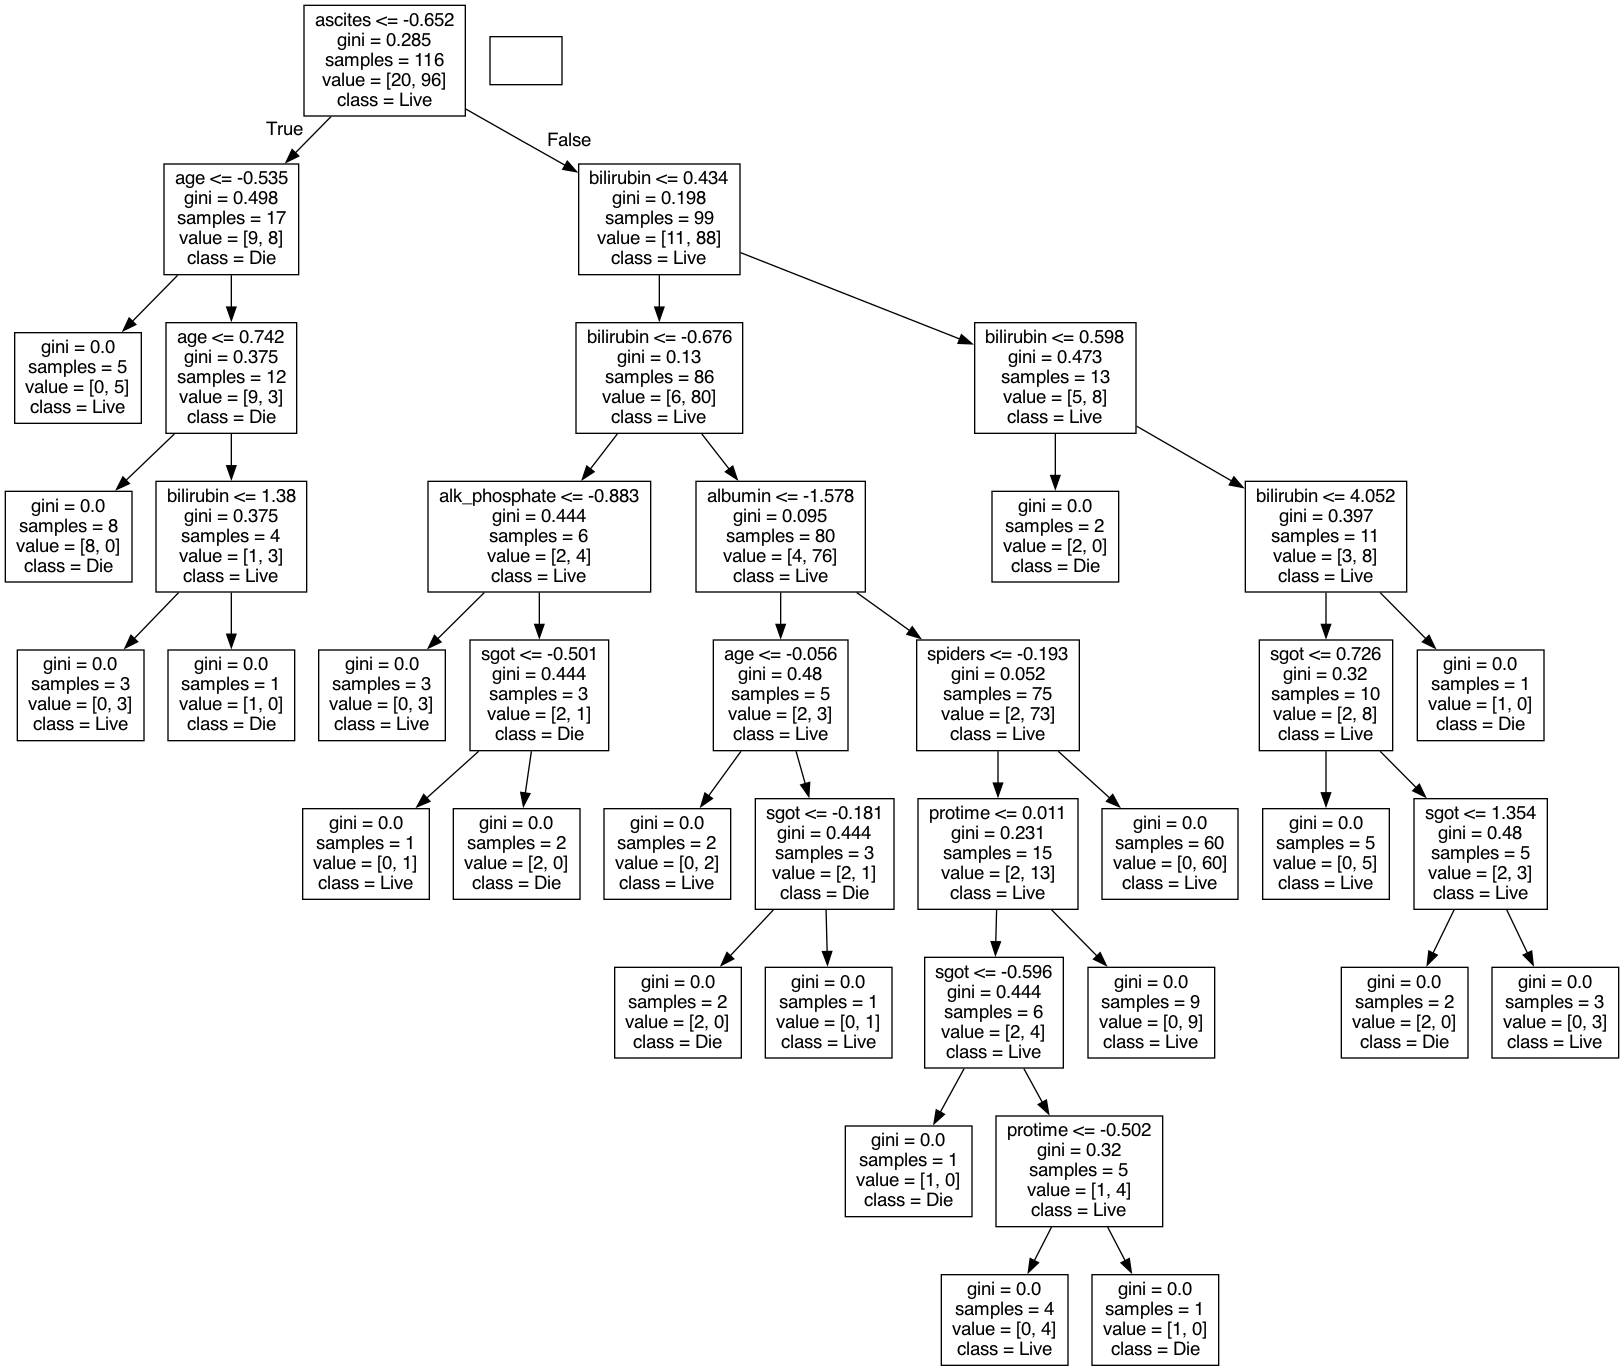

In [66]:
Image(graph.create_png())

In [67]:
# Save the plot
graph.write_png("hep_decisition_tree_plot.png")

True

### Evaluation of Model
+ Confuion Matrix
+ Classification Report
+ Accuracy core


![](confusionmatrix_image.jpg)

In [69]:
from sklearn.metrics import confusion_matrix
# Using Confusion Matrix
confusion_matrix(testy, predictions1)

array([[ 7,  5],
       [ 2, 25]])

/Users/srijanaraut/new/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


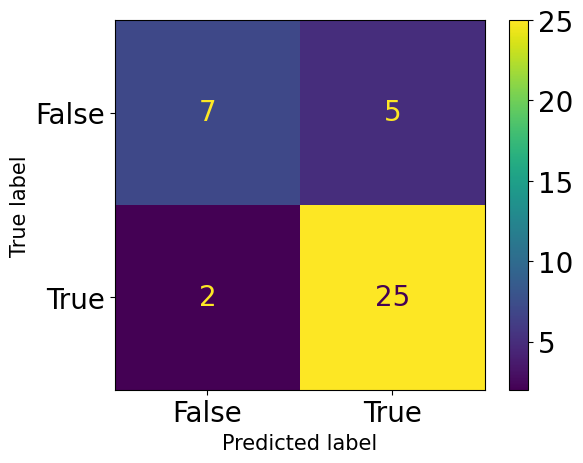

In [70]:
# Plot
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(lrg,testX,testy)


/Users/srijanaraut/new/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


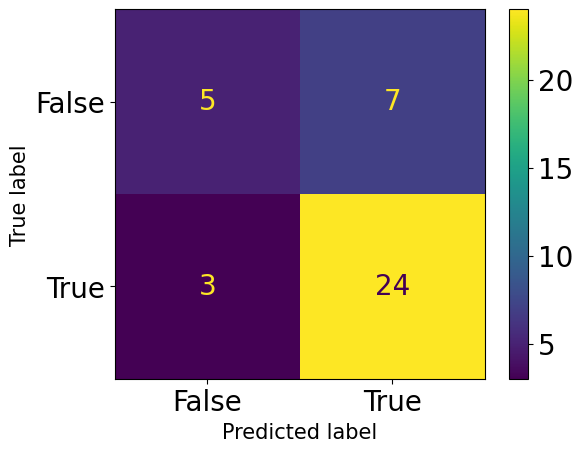

In [72]:
plot_confusion_matrix(knn,testX,testy)

/Users/srijanaraut/new/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


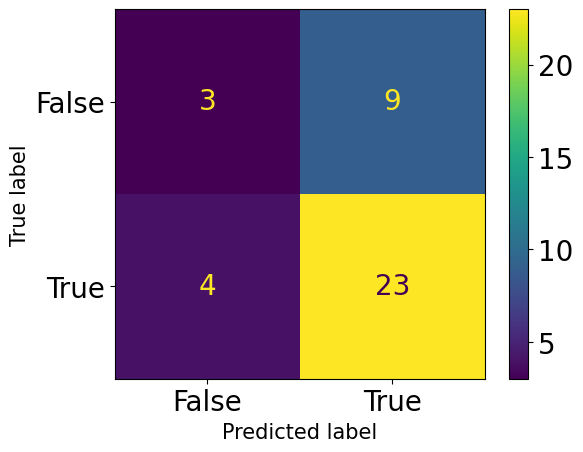

In [73]:
plot_confusion_matrix(dt,testX,testy)

- Submitted To:
    - Dr. VijayaLaxmi Saravanan

- Creadted By:
    - Shreedhar Dahal
    - Srijana Raut
    
